In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Understanding data

In [3]:
iris = datasets.load_iris()
df2 = pd.DataFrame(data = iris["data"], columns=iris["feature_names"])
df2["target"] = iris["target"]
df2.head(-30)

   # 0:"setosa",
    #1:"versicolor",
    #2:"virginica"


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
115,6.4,3.2,5.3,2.3,2
116,6.5,3.0,5.5,1.8,2
117,7.7,3.8,6.7,2.2,2
118,7.7,2.6,6.9,2.3,2


<Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>

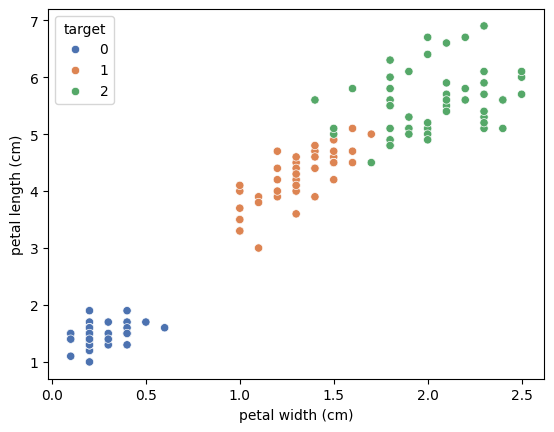

In [4]:
sns.scatterplot(data=df2, x="petal width (cm)", y="petal length (cm)", hue="target",palette="deep")
# 0:"setosa"
# 1:"versicolor",
# 2:"virginica"

In [57]:
"""fig = plt.figure()

ax = plt.axes(projection='3d')


zdata = df2['sepal width (cm)']
xdata = df2['petal length (cm)']
ydata = df2['petal width (cm)']
ax.scatter3D(xdata, ydata, zdata, c=zdata); #cmap='Blues'

plt.show()

"""

"fig = plt.figure()\n\nax = plt.axes(projection='3d')\n\n\nzdata = df2['sepal width (cm)']\nxdata = df2['petal length (cm)']\nydata = df2['petal width (cm)']\nax.scatter3D(xdata, ydata, zdata, c=zdata); #cmap='Blues'\n\nplt.show()\n\n"

In [6]:
df2['setosa'] = np.where(df2['target']== 0, 1, 0)
df2['versicolor'] = np.where(df2['target']== 1, 1, 0)
df2['virginica'] = np.where(df2['target']== 2, 1, 0)
df2.head(-30)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,0,1,0,0
1,4.9,3.0,1.4,0.2,0,1,0,0
2,4.7,3.2,1.3,0.2,0,1,0,0
3,4.6,3.1,1.5,0.2,0,1,0,0
4,5.0,3.6,1.4,0.2,0,1,0,0
...,...,...,...,...,...,...,...,...
115,6.4,3.2,5.3,2.3,2,0,0,1
116,6.5,3.0,5.5,1.8,2,0,0,1
117,7.7,3.8,6.7,2.2,2,0,0,1
118,7.7,2.6,6.9,2.3,2,0,0,1


# Preprocessing

In [7]:
interestingFeatures = ['petal length (cm)', 'petal width (cm)'] #'sepal width (cm)'

X = df2.loc[:, interestingFeatures]
y = df2.loc[:,["versicolor"]]
df2.shape

(150, 8)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

In [9]:
#MinMaxScaler is useful when the data has a bounded range or when the distribution is not Gaussian.
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


# Logistic regression

In [10]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Accuracy, precision and recall

In [11]:
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n {classification_report(y_test,y_pred)}")


-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.5789473684210527
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[22  0]
 [16  0]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
               precision    recall  f1-score   support

           0       0.58      1.00      0.73        22
           1       0.00      0.00      0.00        16

    accuracy                           0.58        38
   macro avg       0.29      0.50      0.37        38
weighted avg       0.34      0.58      0.42        38



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Observations

Confusion Matrix
#### TP | FP*  
#### FN* | TN

#### Accuracy
#### Virginica: 97%
#### Setosa: 100%
#### Versicolor: 58%

#### confusion Matrix Virginica
#### 28 | 1
####  0 | 9

#### confusion Matrix setosa
#### 25 | 1
#### 0  | 13

#### confusion Matrix Versicolor
#### 22 | 0
#### 16 | 0

### Our model fails to recognize Versicolor. Now try to improve versicolor recognition performance.

# #Improvements: 
- Add interesting features
- Stratify our test (test split) 
- Train test from .75 to .80 

### Add a feature to our interesting features set

In [23]:
corr_matrix = df2.corr()
corr_matrix["target"].sort_values(ascending = False)

#sns.heatmap(corr_matrix, annot=True)

target               1.000000e+00
petal width (cm)     9.565473e-01
petal length (cm)    9.490347e-01
virginica            8.660254e-01
sepal length (cm)    7.825612e-01
versicolor           4.038222e-17
sepal width (cm)    -4.266576e-01
setosa              -8.660254e-01
Name: target, dtype: float64

## Observation
Another strong feature would seem to be the length of the sepals (7.83) compared to the sepal width (-4.3).

In [37]:
interestingFeatures = ['petal length (cm)', 'petal width (cm)','sepal length (cm)']#'sepal width (cm)'

X = df2.loc[:, interestingFeatures]
y = df2.loc[:,["setosa"]]
#df2.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df2['target'], random_state=0, train_size = .75) #stratify=y,

#MinMaxScaler is useful when the data has a bounded range or when the distribution is not Gaussian.
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  1.0
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[25  0]
 [ 0 13]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        13

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



## Accuracy Improvement (first attempt)
Virginica: 92%
Versicolor: 66%
Setosa: 100%

# Question: the correlation matrix give me the most interesting feature to improve the recognition of versicolor?
No.

In [47]:
interestingFeatures = ['petal length (cm)', 'petal width (cm)','sepal width (cm)']#'sepal length (cm)'

X = df2.loc[:, interestingFeatures]
y = df2.loc[:,["versicolor"]]
#df2.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df2['target'], random_state=0, train_size = .75) #stratify=y,

#MinMaxScaler is useful when the data has a bounded range or when the distribution is not Gaussian.
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
print("-------------------------------------------------------------------------")
print(f"The accuracy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuracy score is: ------>>  0.6842105263157895
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[23  2]
 [10  3]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
               precision    recall  f1-score   support

           0       0.70      0.92      0.79        25
           1       0.60      0.23      0.33        13

    accuracy                           0.68        38
   macro avg       0.65      0.58      0.56        38
weighted avg       0.66      0.68      0.64        38



# Accuracy with sepal width
Setosa : 100%
Versicolor: 68%
Virginica: 100%
# Accuracy with sepal length
Virginica: 92%
Versicolor: 66%
Setosa: 100%

We improve versicolor recognize, without without worsening the other recognitions. So Sepal width is a feature more interesting than sepal length... Why?

# Final test - Logistic regression (Applying the three clusters togheter)

In [55]:
interestingFeatures = ['petal length (cm)', 'petal width (cm)','sepal width (cm)'] #'sepal length (cm)'

X = df2.loc[:, interestingFeatures]
y = df2["target"]
#df2.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df2['target'], random_state=0, train_size = .75) #stratify=y,

#MinMaxScaler is useful when the data has a bounded range or when the distribution is not Gaussian.
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [56]:
print("-------------------------------------------------------------------------")
print(f"The accuracy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuracy score is: ------>>  0.868421052631579
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[13  0  0]
 [ 0  9  4]
 [ 0  1 11]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.90      0.69      0.78        13
           2       0.73      0.92      0.81        12

    accuracy                           0.87        38
   macro avg       0.88      0.87      0.87        38
weighted avg       0.88      0.87      0.87        38



# Why sepal width is more interesting than sepal length? 

Petal length and Petal width have two strong positive correlation.
Sepal length is another positive correlation, while Sepal width is a negative correlation.

In [65]:
corr_matrix = df2.corr()
corr_matrix["sepal length (cm)"].sort_values(ascending = False)

sepal length (cm)    1.000000
petal length (cm)    0.871754
petal width (cm)     0.817941
target               0.782561
virginica            0.638020
versicolor           0.079396
sepal width (cm)    -0.117570
setosa              -0.717416
Name: sepal length (cm), dtype: float64

In [66]:
corr_matrix = df2.corr()
corr_matrix["sepal width (cm)"].sort_values(ascending = False)

sepal width (cm)     1.000000
setosa               0.603348
sepal length (cm)   -0.117570
virginica           -0.135645
petal width (cm)    -0.366126
target              -0.426658
petal length (cm)   -0.428440
versicolor          -0.467703
Name: sepal width (cm), dtype: float64

# Conclusion
Sepal length has a correlation with versicolor near zero (no correlation)
Sepal width has a negative correlation with versicolor (-0.467)